In [1]:
import numpy as np
import pandas as pd
import time

In [2]:
df = pd.read_csv('/content/Social_Network_Ads (1).csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df = df[['Age','EstimatedSalary','Purchased']]

In [5]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [6]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [7]:
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [9]:
X_scaled.shape

(400, 2)

In [10]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [11]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 151 (604.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

#Implementation of Stochastic gradient descent(batch_size=1)

In [13]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
#start = time.time()
history = model.fit(X_scaled,y,epochs=500,batch_size=1,validation_split=0.2)
#print(time.time() - start)

Epoch 1/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8141 - loss: 0.5231 - val_accuracy: 0.7125 - val_loss: 0.5641
Epoch 2/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8759 - loss: 0.3096 - val_accuracy: 0.7500 - val_loss: 0.4794
Epoch 3/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8597 - loss: 0.3304 - val_accuracy: 0.8125 - val_loss: 0.4008
Epoch 4/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8672 - loss: 0.2673 - val_accuracy: 0.8750 - val_loss: 0.3396
Epoch 5/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8455 - loss: 0.3226 - val_accuracy: 0.9375 - val_loss: 0.2849
Epoch 6/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8764 - loss: 0.2840 - val_accuracy: 0.9375 - val_loss: 0.2698
Epoch 7/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8538 - loss: 0.2920 - val_accuracy: 0.9250 - val_loss: 0.2501
Epoch 8/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8641 - loss: 0.2851 - val_accu

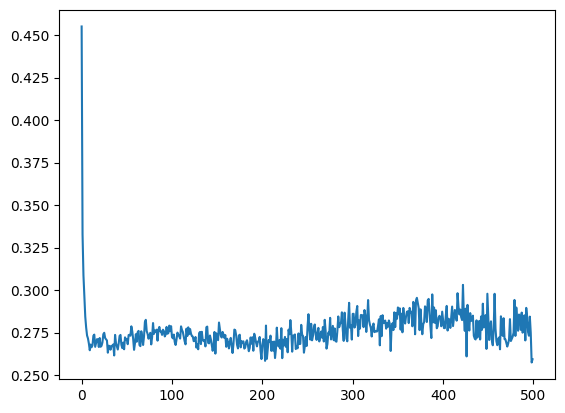

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

#Imlplementation of Batch Gradient Descent (batch_size=df.shape)

In [15]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [16]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
#start = time.time()
history = model.fit(X_scaled,y,epochs=10,batch_size=400,validation_split=0.2)
#print(time.time() - start)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.7125 - loss: 0.6926 - val_accuracy: 0.3625 - val_loss: 0.9269
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step - accuracy: 0.7125 - loss: 0.6848 - val_accuracy: 0.3625 - val_loss: 0.9207
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.7125 - loss: 0.6792 - val_accuracy: 0.3625 - val_loss: 0.9157
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.7125 - loss: 0.6744 - val_accuracy: 0.3625 - val_loss: 0.9113
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.7125 - loss: 0.6702 - val_accuracy: 0.3625 - val_loss: 0.9075
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.7125 - loss: 0.6663 - val_accuracy: 0.3625 - val_loss: 0.9039
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.7125 - loss: 0.6627 - val_accuracy: 0.3625 - val_loss: 0.9007
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.7125 - loss: 0.6593 - val_accuracy: 0.3625 - val_loss: 0.8979
E

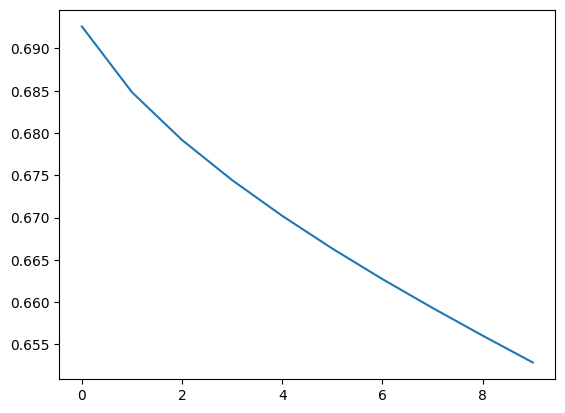

In [17]:
plt.plot(history.history['loss'])

#Implementation of mini-batch gradient descent

In [18]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [20]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
#start = time.time()
history = model.fit(X_scaled,y,epochs=10,batch_size=100,validation_split=0.2)
#print(time.time() - start)
#400/100=4 batches will be build in everry epoch

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.5776 - loss: 0.6606 - val_accuracy: 0.8375 - val_loss: 0.5065
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6225 - loss: 0.6362 - val_accuracy: 0.8750 - val_loss: 0.5101
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6803 - loss: 0.6358 - val_accuracy: 0.8750 - val_loss: 0.5086
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7161 - loss: 0.6298 - val_accuracy: 0.8750 - val_loss: 0.5075
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7319 - loss: 0.6250 - val_accuracy: 0.8750 - val_loss: 0.5029
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7579 - loss: 0.6186 - val_accuracy: 0.8750 - val_loss: 0.4988
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7900 - loss: 0.6099 - val_accuracy: 0.8750 - val_loss: 0.4937
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8120 - loss: 0.5938 - val_accuracy: 0.9250 - val_loss: 0.4943


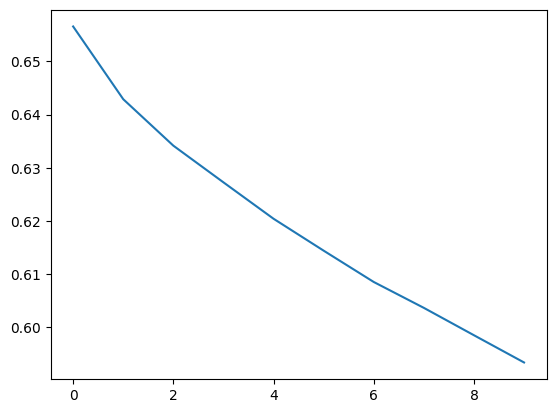

In [21]:
plt.plot(history.history['loss'])